In [1]:
# PERFORMING KMEANS CLUSTERING

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape   # TO GET SHAPE OF DATA

(150, 6)

In [4]:
df.describe()  # TO GET SUMMARY OF DATA

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Id                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
SepalLengthCm    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
SepalWidthCm     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
PetalLengthCm          AxesSubplot(0.125,0.125;0.227941x0.343182)
PetalWidthCm        AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

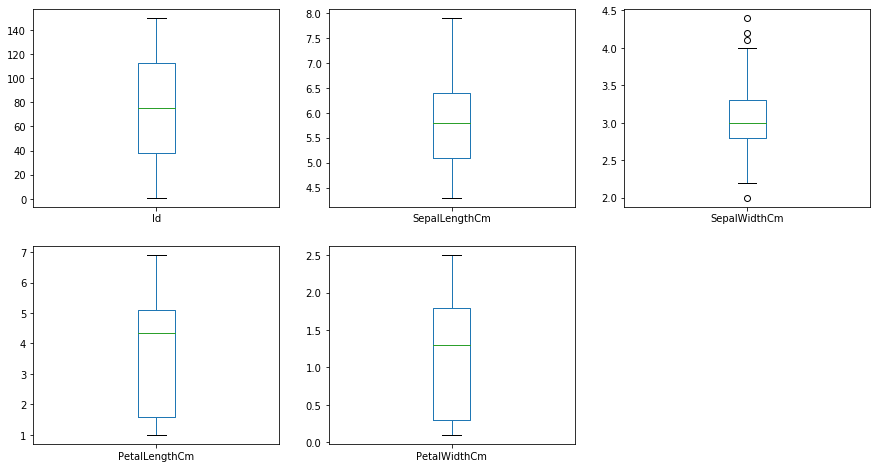

In [6]:
# CHECKING FOR OUTLIERS
df.plot(kind='box',subplots=True, layout=(2,3),figsize=(15,8))

In [7]:
# YES we have outliers , once the PCA step is done, will remove outliers.

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# SINCE WE HAVE 3 CATEGORIES IN SPECIES COLUMN, SO WE SHOULD USE LABEL_ENCODER TO ENCODE THE SPECIES COLUMN

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df['Species'] = le.fit_transform(df['Species'])

In [13]:
df['Species'].unique()

array([0, 1, 2])

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# PERFROMING UNSUPERVISED LEARNING TO PREDICT THE OPTIMIUM NUMBER OF CLUSTERS

In [15]:
from sklearn.decomposition import PCA

In [16]:
#(BY DEFAULT VALUE 0.95)
pca = PCA(n_components=0.95) 
df_decomposed = pca.fit_transform(df)
print(df.shape)
print(df_decomposed.shape)

(150, 6)
(150, 1)


In [17]:
# its giving only 1 feature to work on , so in this case we should avoid PCA

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [19]:
# NOW REMOVING OUTLIERS THROUGH IQR APPROACH

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3 - q1

In [20]:
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

In [21]:
df1 = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]
df1.shape                                                            # OUTLIERS HAVE BEEN REMOVED SUCCESSFULLY.

(146, 6)

In [22]:
df1.drop(['Id'],axis=1,inplace=True)

C:\Users\Aakash\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
df1.shape

(146, 5)

# KMEANS CLUSTERING

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcv = []

for i in range(1,7):
    km = KMeans(n_clusters = i)
    km.fit(df1)
    km.inertia_
    wcv.append(km.inertia_)
print(wcv)    

C:\Users\Aakash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


[751.9708904109593, 170.63840833333336, 82.12217828918803, 61.783305953587096, 46.35606941935985, 38.96266206503952]


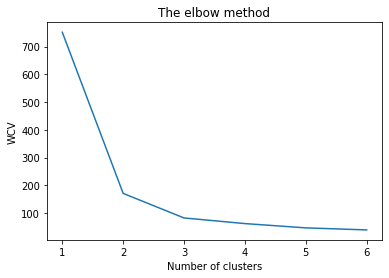

In [26]:
plt.plot(range(1,7),wcv)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCV')
plt.show()

In [27]:
# OPTIMAL NUMBER OF CLUSTER IS 3

In [28]:
km = KMeans(n_clusters=3)
km.fit(df1)

KMeans(n_clusters=3)

In [29]:
y_pred = km.fit_predict(df1)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
pd.Series(y_pred).value_counts()

0    50
2    49
1    47
dtype: int64

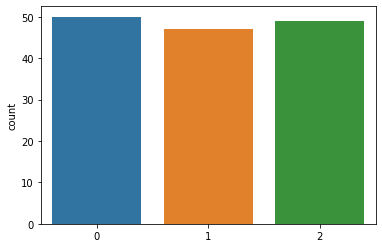

In [31]:
sns.countplot(y_pred)
plt.show()

In [33]:
df1['clusters'] = y_pred

C:\Users\Aakash\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
